## Classification KNN TRAIN

### Libraries

In [456]:
!pip install --upgrade scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math


In [457]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

### Data preprocessing

In [458]:
df = pd.read_csv("train_cleaned.csv")
#test = pd.read_csv("test_cleaned.csv")

In [459]:
df = df.replace({"explicit": {False:0, True:1}})
#test = test.replace({"explicit": {False:0, True:1}})

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  object 
 1   duration_ms       15000 non-null  int64  
 2   explicit          15000 non-null  int64  
 3   popularity        15000 non-null  int64  
 4   artists           15000 non-null  object 
 5   album_name        15000 non-null  object 
 6   danceability      15000 non-null  float64
 7   energy            15000 non-null  float64
 8   key               15000 non-null  int64  
 9   loudness          15000 non-null  float64
 10  speechiness       15000 non-null  float64
 11  acousticness      15000 non-null  float64
 12  instrumentalness  15000 non-null  float64
 13  liveness          15000 non-null  float64
 14  valence           15000 non-null  float64
 15  tempo             15000 non-null  float64
 16  time_signature    15000 non-null  float6

In [461]:
#test.info()

### Preparing the training and test data

In [462]:
X = df.iloc[:, [1,2,6,7,8,9,10,11,12,13,14,15,16]].values
y = np.array(df.iloc[:, [17]].values)

In [463]:
np.unique(y, return_counts=True)

(array(['afrobeat', 'black-metal', 'bluegrass', 'brazil', 'breakbeat',
        'chicago-house', 'disney', 'forro', 'happy', 'idm', 'indian',
        'industrial', 'iranian', 'j-dance', 'j-idol', 'mandopop', 'sleep',
        'spanish', 'study', 'techno'], dtype=object),
 array([750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750, 750, 750, 750, 750]))

np.unique(y_val, return_counts=True)

## Partitioning

In [464]:
from sklearn.model_selection import train_test_split

In [465]:
random_state = 0

In [466]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.333333333333333333, stratify=y, random_state=random_state
)

In [467]:
#with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_val, return_counts=True)[1] / len(y_val))

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


In [468]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(10000, 13) (5000, 13) (10000, 1) (5000, 1)


## Normalization

In [469]:
from sklearn.preprocessing import MinMaxScaler

In [470]:
norm = MinMaxScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_val_norm = norm.transform(X_val)

## Classifiers
Classifiers usually have a:
- `fit` method to train them on training data
- `predict` method to validate/test them on validation/test data

## KNN

In [471]:
from sklearn.neighbors import KNeighborsClassifier

In [472]:
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)

In [473]:
clf = KNeighborsClassifier(n_neighbors=27, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=27)

In [474]:
import warnings

# To suppress all warnings (not recommended)
warnings.filterwarnings("ignore")

In [475]:
# predict: Predict the class labels for the provided data.
y_val_pred = clf.predict(X_val_norm)
y_val_pred

array(['disney', 'j-idol', 'study', ..., 'study', 'black-metal',
       'industrial'], dtype=object)

In [476]:
# y_test contains the target labels
y_val

array(['disney', 'mandopop', 'chicago-house', ..., 'disney',
       'black-metal', 'j-idol'], dtype=object)

In [477]:
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.3814


In [478]:
# score: Return the mean accuracy on the given test data and labels.
clf.score(X_val_norm, y_val)

0.3814

In [479]:
# KNeighborsClassifier.score is doing this
(y_val_pred == y_val).sum() / len(y_val)

0.3814

#### Performance evaluation

In [480]:
# print("F1:", f1_score(y_test, y_test_pred))

In [481]:
print("F1:", f1_score(y_val, y_val_pred, average="macro"))

F1: 0.3644620636154987


In [482]:
print("F1:", f1_score(y_val, y_val_pred, average="micro"))

F1: 0.3814


In [483]:
print("F1:", f1_score(y_val, y_val_pred, labels=['black-metal'], average="micro"))

F1: 0.5785123966942148


In [484]:
print("F1:", f1_score(y_val, y_val_pred, labels=['sleep'], average="macro"))

F1: 0.6821345707656613


In [485]:
print(classification_report(y_val, y_val_pred))

               precision    recall  f1-score   support

     afrobeat       0.22      0.16      0.19       250
  black-metal       0.49      0.70      0.58       250
    bluegrass       0.34      0.42      0.37       250
       brazil       0.27      0.19      0.23       250
    breakbeat       0.26      0.20      0.23       250
chicago-house       0.35      0.54      0.42       250
       disney       0.39      0.32      0.36       250
        forro       0.45      0.57      0.50       250
        happy       0.34      0.39      0.36       250
          idm       0.34      0.12      0.18       250
       indian       0.22      0.14      0.17       250
   industrial       0.29      0.30      0.29       250
      iranian       0.38      0.25      0.30       250
      j-dance       0.48      0.49      0.48       250
       j-idol       0.35      0.55      0.43       250
     mandopop       0.29      0.58      0.39       250
        sleep       0.81      0.59      0.68       250
      spa

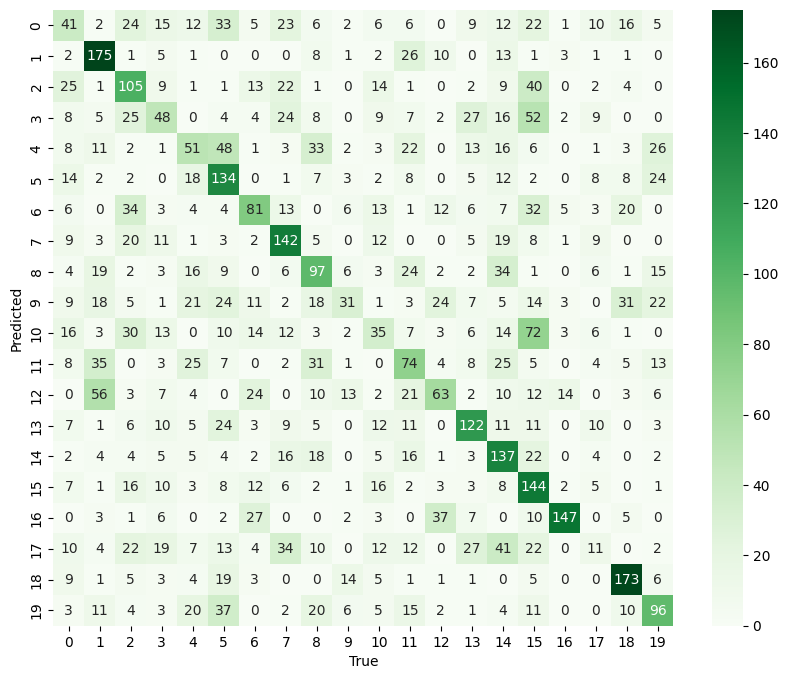

In [486]:
cf = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [487]:
# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_val_norm)

y_val_pred_proba[0:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.40740741, 0.        , 0.        , 0.03703704,
        0.03703704, 0.        , 0.25925926, 0.        , 0.        ,
        0.        , 0.25925926, 0.        , 0.        , 0.        ],
       [0.07407407, 0.        , 0.07407407, 0.03703704, 0.03703704,
        0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.        ,
        0.        , 0.11111111, 0.03703704, 0.03703704, 0.22222222,
        0.07407407, 0.        , 0.14814815, 0.        , 0.        ],
       [0.03703704, 0.        , 0.03703704, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.25925926,
        0.03703704, 0.        , 0.03703704, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.40740741, 0.18518519],
       [0.03703704, 0.        , 0.03703704, 0.03703704, 0.11111111,
        0.07407407, 0.        , 0.14814815, 0.18518519, 0.        ,
        0.        , 0.03703704, 0.        , 0

In [488]:
y_val_pred[11:21]

array(['indian', 'brazil', 'indian', 'afrobeat', 'j-idol', 'study',
       'spanish', 'study', 'idm', 'black-metal'], dtype=object)

In [489]:
y_val_pred[0:10]

array(['disney', 'j-idol', 'study', 'j-idol', 'black-metal', 'brazil',
       'j-idol', 'idm', 'chicago-house', 'industrial'], dtype=object)

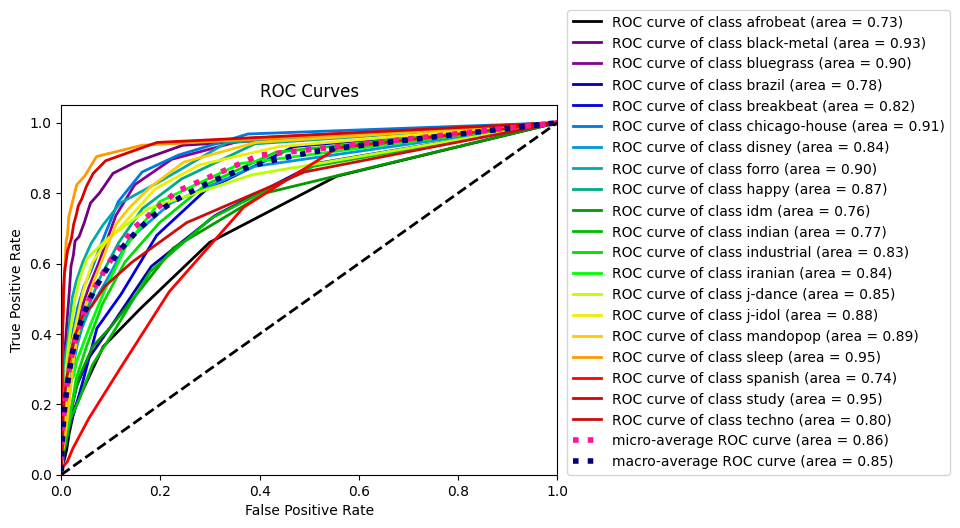

In [490]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_val, y_val_pred_proba)
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

In [491]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
roc_auc_score(y_val, y_val_pred_proba, multi_class="ovr", average="macro")

0.8470699789473685

In [492]:
#roc_auc_score(y_val, y_val_pred_proba, multi_class="ovr", average="micro")

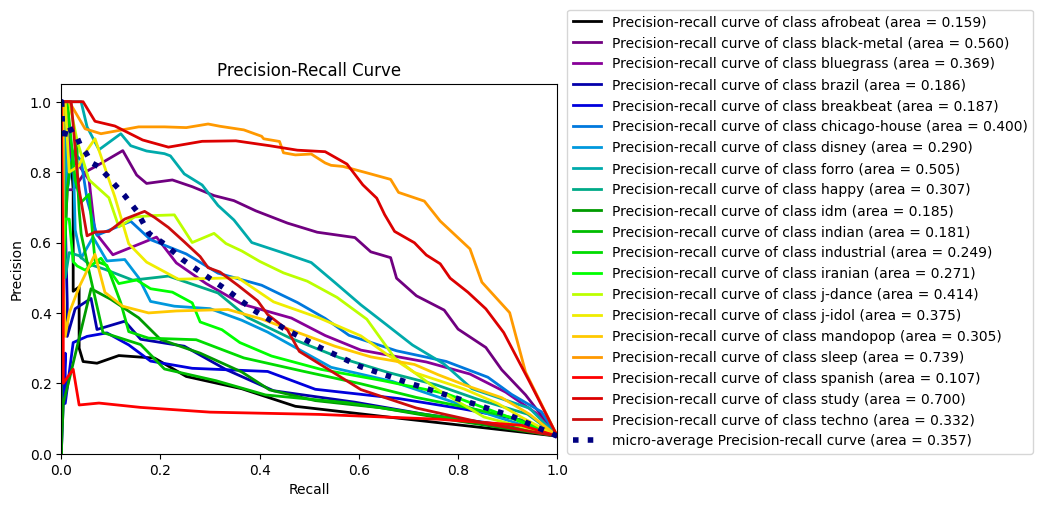

In [493]:
plot_precision_recall(y_val, y_val_pred_proba)
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

#### Repeated Holdout

In [494]:
N = 50
err = 0

for i in range(N):
    # stratified holdout
    X_rh_train, X_rh_val, y_rh_train, y_rh_val = train_test_split(X, y, test_size=0.333333333333333333, stratify=y)

    # normalize train set
    norm.fit(X_rh_train)
    X_rh_train_norm = norm.transform(X_rh_train)
    X_rh_val_norm = norm.transform(X_rh_val)

    # initialize and fit classifier
    clf = KNeighborsClassifier(n_neighbors=27, metric="euclidean", weights="uniform")
    clf.fit(X_rh_train_norm, y_rh_train)

    # computing error
    acc = clf.score(X_rh_val_norm, y_rh_val)
    err += 1 - acc

print("Overall error estimate:", err/N)

Overall error estimate: 0.6169799999999998


#### Cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [495]:
from sklearn.model_selection import cross_val_score
k = 10

In [496]:
# initialize classifier
clf = KNeighborsClassifier(n_neighbors=27, metric="euclidean", weights="uniform")

scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
scores

array([0.381, 0.398, 0.387, 0.351, 0.412, 0.36 , 0.395, 0.359, 0.361,
       0.386])

In [497]:
print("Overall error estimate:", 1 - scores.mean())

Overall error estimate: 0.621


In [498]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.3790 (+/- 0.02)


In [499]:
# scoring default is accuracy
cross_val_score(clf, X_train_norm, y_train, cv=k, scoring='f1_macro')

array([0.36453988, 0.38248618, 0.36677104, 0.33953895, 0.39533066,
       0.34743488, 0.38170637, 0.34492779, 0.34733018, 0.37032487])

### Hyperparameters Tuning

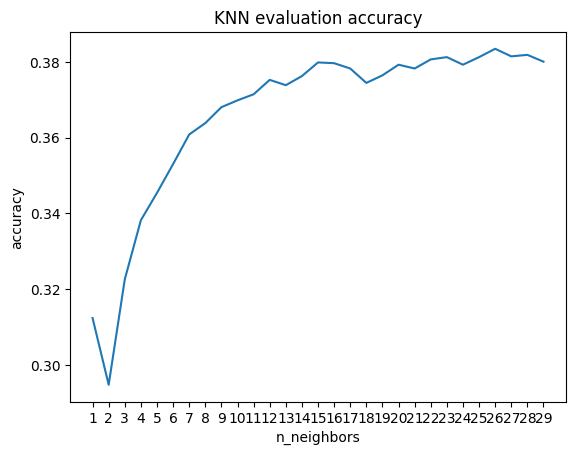

In [500]:
n_neighbors = range(1,30)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_val_norm, y_val))

plt.plot(scores)
plt.title('KNN evaluation accuracy')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.savefig('Accuracy VAL 1-30.png')
plt.show()

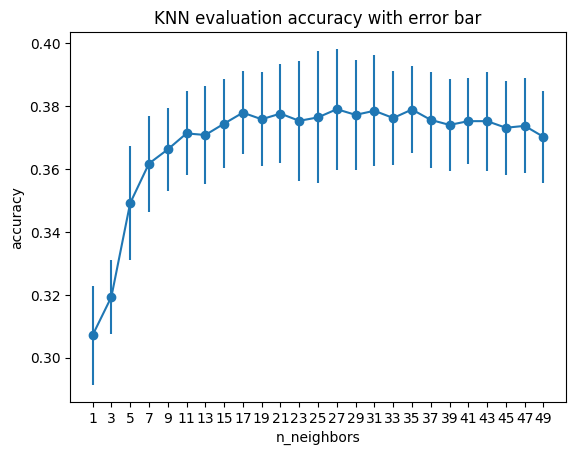

In [501]:
n_neighbors = range(1,50, 2)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
#plt.figure(figsize=(10, 8))
plt.title('KNN evaluation accuracy with error bar')
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.savefig('Errorbar VAL 1-30.png')
plt.show()

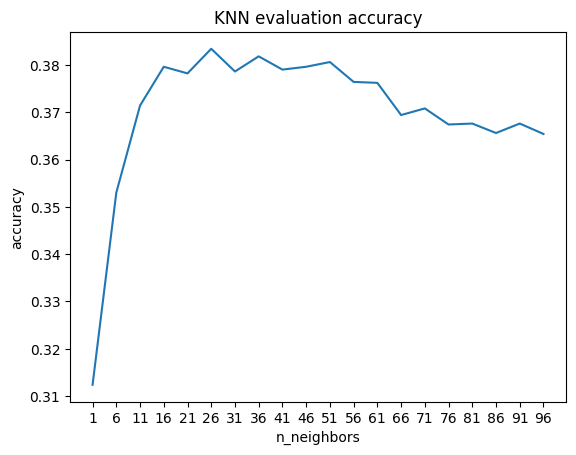

In [502]:
n_neighbors = range(1,100, 5)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_val_norm, y_val))

plt.plot(scores)
plt.title('KNN evaluation accuracy')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
#plt.savefig('Accuracy VAL 1-30.png')
plt.show()

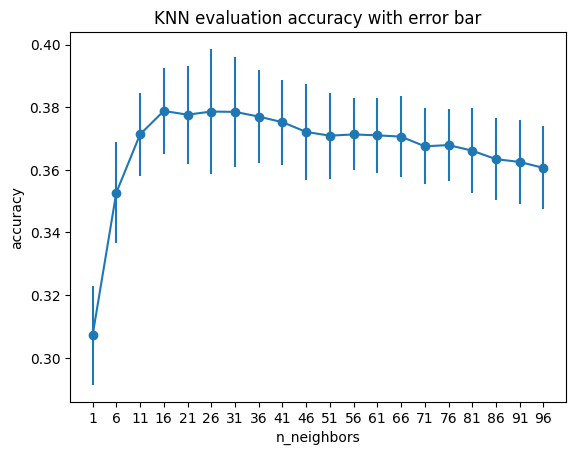

In [503]:
n_neighbors = range(1,100, 5)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
#plt.figure(figsize=(10, 8))
plt.title('KNN evaluation accuracy with error bar')
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
#plt.savefig('Errorbar VAL 1-30.png')
plt.show()

In [504]:
clf = KNeighborsClassifier(n_neighbors=27, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)
y_val_pred = clf.predict(X_val_norm)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.3814


#### Grid Search

In [505]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [506]:
%%time

param_grid = { "n_neighbors": np.arange(1, 30), "weights": ["uniform", "distance"], "metric": ["euclidean", "cityblock"], }

grid = GridSearchCV( KNeighborsClassifier(), param_grid=param_grid, cv=RepeatedStratifiedKFold(random_state=0), n_jobs=-1, refit=True, verbose=2)



CPU times: user 94 µs, sys: 0 ns, total: 94 µs
Wall time: 100 µs


In [507]:
%%time

grid.fit(X_train_norm, y_train)


Fitting 50 folds for each of 116 candidates, totalling 5800 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'cityblock'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [508]:
clf = grid.best_estimator_

In [509]:
print(grid.best_params_, grid.best_score_)

{'metric': 'cityblock', 'n_neighbors': 24, 'weights': 'distance'} 0.4104900000000001


In [510]:
y_val_pred = clf.predict(X_val_norm)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.415


In [511]:
clf.score(X_val_norm, y_val)

0.415

In [512]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028330,0.006803,0.319813,0.080349,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.3035,0.3200,...,0.3145,0.3090,0.3000,0.3175,0.3215,0.3095,0.3015,0.30850,0.008832,113
1,0.029860,0.009210,0.224844,0.066453,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.3035,0.3200,...,0.3145,0.3090,0.3000,0.3175,0.3215,0.3095,0.3015,0.30850,0.008832,113
2,0.025719,0.001564,0.327180,0.031989,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.2930,0.2985,...,0.2970,0.2970,0.2940,0.3050,0.2940,0.3050,0.2990,0.29569,0.008661,116
3,0.029305,0.008797,0.245710,0.066498,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.3035,0.3200,...,0.3145,0.3090,0.3000,0.3175,0.3215,0.3095,0.3015,0.30850,0.008832,113
4,0.030394,0.009844,0.374821,0.083142,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.3290,0.3185,...,0.3265,0.3160,0.3135,0.3245,0.3190,0.3230,0.3295,0.32051,0.007560,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.027183,0.005871,0.610556,0.096934,cityblock,27,distance,"{'metric': 'cityblock', 'n_neighbors': 27, 'we...",0.4255,0.4105,...,0.4015,0.4100,0.4035,0.4135,0.4030,0.4090,0.4080,0.40940,0.008365,10
112,0.028682,0.005397,0.765106,0.160846,cityblock,28,uniform,"{'metric': 'cityblock', 'n_neighbors': 28, 'we...",0.4170,0.4060,...,0.3895,0.3985,0.3995,0.4080,0.4060,0.3925,0.3990,0.40203,0.009206,21
113,0.028513,0.009294,0.613321,0.096889,cityblock,28,distance,"{'metric': 'cityblock', 'n_neighbors': 28, 'we...",0.4235,0.4100,...,0.4055,0.4095,0.4030,0.4140,0.4065,0.4070,0.4105,0.40982,0.008304,7
114,0.028809,0.008013,0.752665,0.148107,cityblock,29,uniform,"{'metric': 'cityblock', 'n_neighbors': 29, 'we...",0.4175,0.4045,...,0.3875,0.4000,0.3985,0.4045,0.3995,0.3965,0.4005,0.40156,0.008791,25


In [513]:
results["metric_weight"] = results["param_metric"] + ", " + results["param_weights"]

In [514]:
results["metric_weight"] = results["param_metric"] + ", " + results["param_weights"]

### Naive Bayes

In [515]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

#### Gaussian

In [516]:
clf = GaussianNB()

In [517]:
%%time
clf.fit(X_train, y_train)

CPU times: user 24.5 ms, sys: 0 ns, total: 24.5 ms
Wall time: 25.7 ms


GaussianNB()

In [518]:
y_pred = clf.predict(X_val)
y_pred

array(['disney', 'j-idol', 'mandopop', ..., 'study', 'j-dance', 'j-idol'],
      dtype='<U13')

In [519]:
print(classification_report(y_val, y_pred))

               precision    recall  f1-score   support

     afrobeat       0.00      0.00      0.00       250
  black-metal       0.23      0.10      0.14       250
    bluegrass       0.14      0.02      0.03       250
       brazil       0.14      0.04      0.06       250
    breakbeat       0.18      0.01      0.02       250
chicago-house       0.27      0.61      0.37       250
       disney       0.29      0.29      0.29       250
        forro       0.03      0.00      0.01       250
        happy       0.17      0.42      0.24       250
          idm       0.21      0.05      0.08       250
       indian       0.08      0.01      0.01       250
   industrial       0.11      0.01      0.02       250
      iranian       0.46      0.10      0.17       250
      j-dance       0.15      0.57      0.24       250
       j-idol       0.19      0.56      0.28       250
     mandopop       0.16      0.38      0.23       250
        sleep       0.62      0.41      0.49       250
      spa

In [520]:
clf.predict_proba(X_val)

array([[8.02085687e-03, 3.02895267e-04, 6.49638576e-03, ...,
        7.22333120e-04, 1.23386198e-01, 9.91847561e-05],
       [2.83719496e-02, 3.73344073e-02, 4.07509945e-02, ...,
        7.55580644e-02, 2.23350331e-04, 2.97559459e-02],
       [6.09638859e-02, 2.58715908e-02, 9.06272740e-02, ...,
        6.51533320e-02, 1.21382592e-03, 7.80658299e-02],
       ...,
       [5.09378373e-02, 2.32655003e-02, 7.80314578e-02, ...,
        4.48365014e-02, 3.15208410e-01, 3.53918566e-02],
       [4.40637756e-02, 3.30272210e-02, 5.96153881e-02, ...,
        8.57579498e-02, 1.10000249e-02, 6.50330221e-02],
       [4.11860007e-02, 3.99173678e-02, 3.25894390e-02, ...,
        6.73101761e-02, 1.25473152e-05, 6.82486418e-02]])

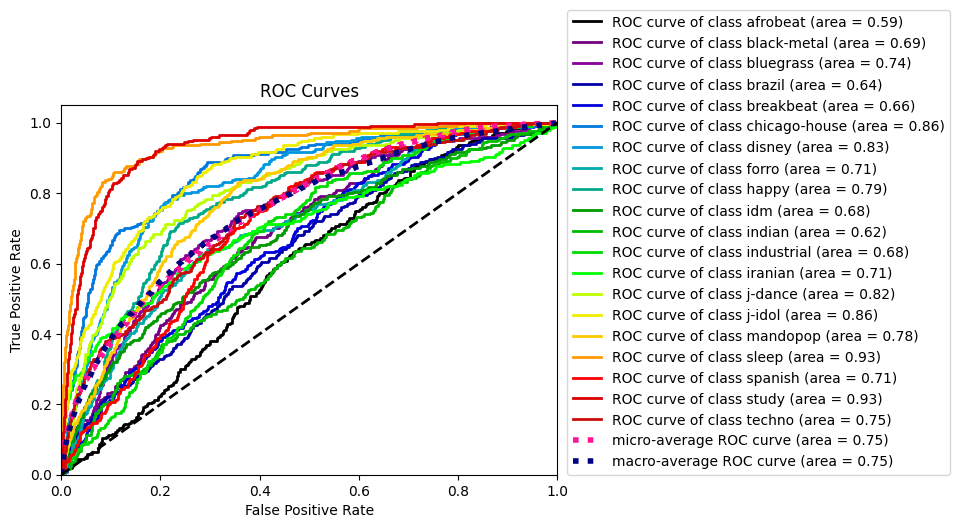

0.7485370526315789


In [521]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_val, clf.predict_proba(X_val))
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.show()
print(roc_auc_score(y_val, clf.predict_proba(X_val), multi_class="ovr", average="macro"))

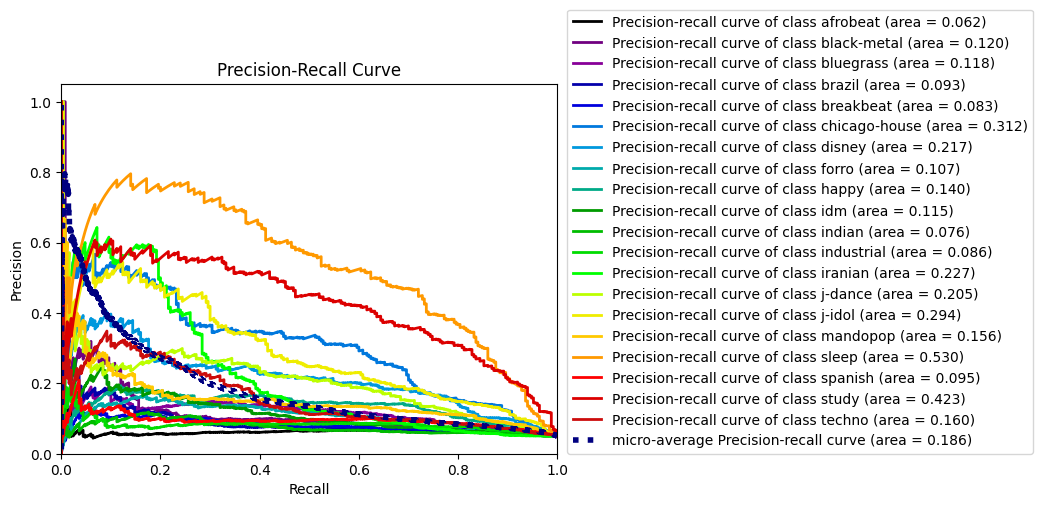

In [522]:
plot_precision_recall(y_val, clf.predict_proba(X_val))
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

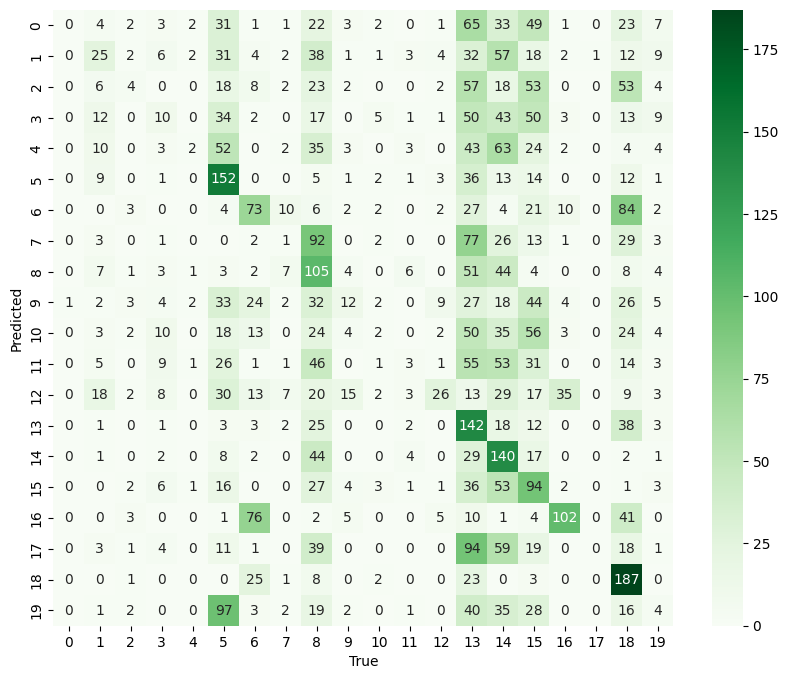

In [523]:
cf = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()